<a href="https://colab.research.google.com/github/gramelon2003/Python_ptdl/blob/master/Pandas_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh (sử dụng Google Colab)

In [36]:
from google.colab import files
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics as sta
import seaborn as sns; sns.set(style='white')
from scipy.stats import pearsonr

In [3]:
uploaded = files.upload()

Saving database.csv to database (2).csv


In [5]:
a = pd.read_csv("database.csv")
a

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các cột dữ liệu định lượng này.

In [6]:
a1 = a.drop(a.columns[[0, 1, 4, 5, 6, 7, 14, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35]], axis=1)

In [7]:
a1

,Incident Month,Incident Day,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine1 Position,Engine2 Position,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,1,1,148,26,4.0,34.0,40,2.0,1,1.0,...,0,0,0,0,1,1,0,0,0,0
1,1,1,583,90,4.0,34.0,10,2.0,5,5.0,...,0,0,0,0,0,0,0,0,1,0
2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,3,345,NaN,3.0,22.0,NaN,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,3,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,9,30,148,42.0,4.0,10.0,1,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
174100,9,30,148,42.0,4.0,10.0,1,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
174101,9,30,226,49.0,2.0,46.0,1,2.0,5.0,5.0,...,1,1,0,0,0,0,0,0,0,0
174102,9,30,303,10.0,3.0,31.0,10,2.0,4.0,4.0,...,1,0,0,0,0,0,0,0,0,0


Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các cột dữ liệu định lượng này.

mean mode median

In [8]:
print(np.mean(a1))

Incident Month            7.171840
Incident Day             15.712264
Aircraft Mass             3.510611
Engine Make              21.306958
Engines                   2.057656
Engine2 Position          2.918570
Engine4 Position          2.058538
Height                  831.032283
Speed                   141.925622
Distance                  0.703738
Aircraft Damage           0.085977
Radome Strike             0.107757
Radome Damage             0.009150
Windshield Strike         0.138934
Windshield Damage         0.005956
Nose Strike               0.122369
Nose Damage               0.006577
Engine1 Strike            0.055605
Engine1 Damage            0.014445
Engine2 Strike            0.045168
Engine2 Damage            0.011619
Engine3 Strike            0.003182
Engine3 Damage            0.000971
Engine4 Strike            0.001918
Engine4 Damage            0.000425
Engine Ingested           0.055180
Propeller Strike          0.020086
Propeller Damage          0.003326
Wing or Rotor Strike

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
a1.mode()


,Incident Month,Incident Day,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine1 Position,Engine2 Position,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,8,10,148,24.0,4.0,10.0,1,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
a1.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Incident Month            8.0
Incident Day             16.0
Aircraft Mass             4.0
Engine Make              22.0
Engines                   2.0
Engine2 Position          1.0
Engine4 Position          1.0
Height                   50.0
Speed                   138.0
Distance                  0.0
Aircraft Damage           0.0
Radome Strike             0.0
Radome Damage             0.0
Windshield Strike         0.0
Windshield Damage         0.0
Nose Strike               0.0
Nose Damage               0.0
Engine1 Strike            0.0
Engine1 Damage            0.0
Engine2 Strike            0.0
Engine2 Damage            0.0
Engine3 Strike            0.0
Engine3 Damage            0.0
Engine4 Strike            0.0
Engine4 Damage            0.0
Engine Ingested           0.0
Propeller Strike          0.0
Propeller Damage          0.0
Wing or Rotor Strike      0.0
Wing or Rotor Damage      0.0
Fuselage Strike           0.0
Fuselage Damage           0.0
Landing Gear Strike       0.0
Landing Ge

Phương sai độ lệch chuẩn

In [11]:
print(np.var(a1))
print(np.std(a1))

Incident Month          7.784904e+00
Incident Day            7.742909e+01
Aircraft Mass           7.634909e-01
Engine Make             1.215091e+02
Engines                 2.203098e-01
Engine2 Position        4.032850e+00
Engine4 Position        2.075810e+00
Height                  3.253125e+06
Speed                   2.200109e+03
Distance                1.200241e+01
Aircraft Damage         7.858524e-02
Radome Strike           9.614577e-02
Radome Damage           9.065987e-03
Windshield Strike       1.196315e-01
Windshield Damage       5.920734e-03
Nose Strike             1.073951e-01
Nose Damage             6.533278e-03
Engine1 Strike          5.251281e-02
Engine1 Damage          1.423672e-02
Engine2 Strike          4.312822e-02
Engine2 Damage          1.148448e-02
Engine3 Strike          3.171881e-03
Engine3 Damage          9.697420e-04
Engine4 Strike          1.914713e-03
Engine4 Damage          4.248527e-04
Engine Ingested         5.213487e-02
Propeller Strike        1.968226e-02
P

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


min max

In [12]:
print(np.max(a1))
print(np.min(a1))

Incident Month             12.0
Incident Day               31.0
Aircraft Mass               5.0
Engine Make                92.0
Engines                     4.0
Engine2 Position            7.0
Engine4 Position            5.0
Height                  31300.0
Speed                    2500.0
Distance                  150.0
Aircraft Damage             1.0
Radome Strike               1.0
Radome Damage               1.0
Windshield Strike           1.0
Windshield Damage           1.0
Nose Strike                 1.0
Nose Damage                 1.0
Engine1 Strike              1.0
Engine1 Damage              1.0
Engine2 Strike              1.0
Engine2 Damage              1.0
Engine3 Strike              1.0
Engine3 Damage              1.0
Engine4 Strike              1.0
Engine4 Damage              1.0
Engine Ingested             1.0
Propeller Strike            1.0
Propeller Damage            1.0
Wing or Rotor Strike        1.0
Wing or Rotor Damage        1.0
Fuselage Strike             1.0
Fuselage

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các ngoại lệ không?nếu có thì ở cột nào?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


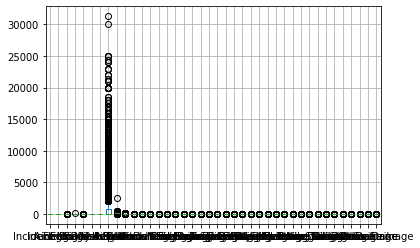

In [13]:
a1.boxplot()

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

In [20]:
a2 = a1.dropna()
a2

,Incident Month,Incident Day,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine1 Position,Engine2 Position,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
199,5,6,148,14,5.0,34.0,13,4.0,1,1.0,...,0,0,1,1,0,0,0,0,0,0
272,5,15,168,4,4.0,7.0,43,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
497,6,20,583,38,4.0,10.0,1,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
564,7,3,148,14,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1170,9,12,148,14,5.0,22.0,7,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169316,7,9,148,34,5.0,22.0,7,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
169623,7,14,148,34,5.0,22.0,7,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
170241,7,25,148,34,5.0,22.0,7,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
171334,8,11,148,34,5.0,22.0,7,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
print(a2.describe())

       Incident Month  Incident Day  Aircraft Mass  Engine Make  Engines  \
count      300.000000    300.000000     300.000000   300.000000    300.0   
mean         7.370000     15.380000       4.573333    22.103333      4.0   
std          2.865975      8.864019       0.534391    11.287042      0.0   
min          1.000000      1.000000       3.000000     1.000000      4.0   
25%          5.000000      7.000000       4.000000    10.000000      4.0   
50%          8.000000     15.000000       5.000000    22.000000      4.0   
75%         10.000000     23.000000       5.000000    34.000000      4.0   
max         12.000000     31.000000       5.000000    37.000000      4.0   

       Engine2 Position  Engine4 Position        Height       Speed  \
count        300.000000        300.000000    300.000000  300.000000   
mean           1.113333          1.483333    590.550000  134.173333   
std            0.584489          1.110781   1629.693976   44.098968   
min            1.000000        

In [22]:
Q1 = a2.quantile(0.25)
Q3 = a2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Incident Month           5.00
Incident Day            16.00
Aircraft Mass            1.00
Engine Make             24.00
Engines                  0.00
Engine2 Position         0.00
Engine4 Position         0.00
Height                  35.00
Speed                   52.25
Distance                 0.00
Aircraft Damage          0.00
Radome Strike            0.00
Radome Damage            0.00
Windshield Strike        0.00
Windshield Damage        0.00
Nose Strike              0.00
Nose Damage              0.00
Engine1 Strike           0.00
Engine1 Damage           0.00
Engine2 Strike           0.00
Engine2 Damage           0.00
Engine3 Strike           0.00
Engine3 Damage           0.00
Engine4 Strike           0.00
Engine4 Damage           0.00
Engine Ingested          0.00
Propeller Strike         0.00
Propeller Damage         0.00
Wing or Rotor Strike     0.00
Wing or Rotor Damage     0.00
Fuselage Strike          0.00
Fuselage Damage          0.00
Landing Gear Strike      0.00
Landing Ge

In [27]:
a3 = a2[~((a2 < (Q1 - 1.5 * IQR)) |(a2 > (Q3 + 1.5 * IQR))).any(axis=1)]
a3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Incident Month,Incident Day,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine1 Position,Engine2 Position,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
272,5,15,168,4,4.0,7.0,43,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3884,9,16,148,14,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4028,9,30,583,18,4.0,34.0,1,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4253,10,20,148,96,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
6434,8,25,148,96,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
6649,9,10,148,96,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
12254,9,7,148,15.0,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
13007,11,9,148,14.0,5.0,34.0,13,4.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
46619,5,2,148,14.0,5.0,34.0,13,4.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Incident Month            7.171840
Incident Day             15.712264
Aircraft Mass             3.510611
Engine Make              21.306958
Engines                   2.057656
Engine2 Position          2.918570
Engine4 Position          2.058538
Height                  831.032283
Speed                   141.925622
Distance                  0.703738
Aircraft Damage           0.085977
Radome Strike             0.107757
Radome Damage             0.009150
Windshield Strike         0.138934
Windshield Damage         0.005956
Nose Strike               0.122369
Nose Damage               0.006577
Engine1 Strike            0.055605
Engine1 Damage            0.014445
Engine2 Strike            0.045168
Engine2 Damage            0.011619
Engine3 Strike            0.003182
Engine3 Damage            0.000971
Engine4 Strike            0.001918
Engine4 Damage            0.000425
Engine Ingested           0.055180
Propeller Strike          0.020086
Propeller Damage          0.003326
Wing or Rotor Strike

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Incident Month            8.0
Incident Day             16.0
Aircraft Mass             4.0
Engine Make              22.0
Engines                   2.0
Engine2 Position          1.0
Engine4 Position          1.0
Height                   50.0
Speed                   138.0
Distance                  0.0
Aircraft Damage           0.0
Radome Strike             0.0
Radome Damage             0.0
Windshield Strike         0.0
Windshield Damage         0.0
Nose Strike               0.0
Nose Damage               0.0
Engine1 Strike            0.0
Engine1 Damage            0.0
Engine2 Strike            0.0
Engine2 Damage            0.0
Engine3 Strike            0.0
Engine3 Damage            0.0
Engine4 Strike            0.0
Engine4 Damage            0.0
Engine Ingested           0.0
Propeller Strike          0.0
Propeller Damage          0.0
Wing or Rotor Strike      0.0
Wing or Rotor Damage      0.0
Fuselage Strike           0.0
Fuselage Damage           0.0
Landing Gear Strike       0.0
Landing Ge

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


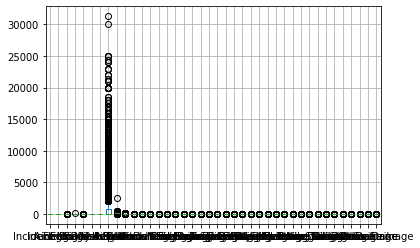

In [28]:
print(np.mean(a1))
print(a1.mode())
print(a1.median())
print(np.max(a1))
print(np.min(a1))
a1.boxplot()

Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation matrix)

In [29]:
a1.corr(method='pearson')

,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
Incident Month,1.000000,-0.045127,-0.001242,0.006968,-0.001657,0.009084,-0.012094,0.031616,0.027447,0.017401,...,0.003569,0.002172,-0.004896,0.001086,0.003006,-0.000892,-0.003433,-0.004992,-0.008582,-0.004121
Incident Day,-0.045127,1.000000,-0.002145,0.000003,-0.003668,0.006571,0.005056,-0.001911,-0.004939,-0.001444,...,-0.002505,-0.002110,0.000434,-0.000857,0.000798,0.000609,0.001837,0.001312,0.004439,-0.000295
Aircraft Mass,-0.001242,-0.002145,1.000000,0.184513,0.515278,-0.450428,-0.576765,0.086614,0.431402,0.078564,...,0.071265,-0.066250,-0.080101,-0.107004,-0.099322,-0.075724,-0.026334,-0.029291,-0.047194,-0.110565
Engine Make,0.006968,0.000003,0.184513,1.000000,0.229766,0.271807,-0.565089,0.014429,0.087756,-0.001659,...,0.018961,-0.011907,-0.023748,-0.025955,-0.038407,-0.034207,0.000160,0.004980,-0.045633,-0.021239
Engines,-0.001657,-0.003668,0.515278,0.229766,1.000000,0.204964,NaN,0.048184,0.274281,0.038374,...,0.040665,-0.032652,-0.044401,-0.050254,-0.054156,-0.044304,-0.011871,-0.012163,-0.046070,-0.059369
Engine2 Position,0.009084,0.006571,-0.450428,0.271807,0.204964,1.000000,0.851701,-0.073610,-0.137423,-0.082867,...,-0.039565,0.015516,0.042140,0.028423,0.019395,-0.002048,0.025579,0.025024,0.030792,0.021520
Engine4 Position,-0.012094,0.005056,-0.576765,-0.565089,NaN,0.851701,1.000000,-0.074727,-0.220360,0.023917,...,0.007597,-0.029489,0.008943,-0.024056,-0.011267,-0.024163,0.035249,0.013978,0.057082,-0.031502
Height,0.031616,-0.001911,0.086614,0.014429,0.048184,-0.073610,-0.074727,1.000000,0.672248,0.856572,...,0.049968,0.052625,-0.085556,-0.026185,0.023692,0.042083,-0.005747,-0.002526,-0.093674,0.008500
Speed,0.027447,-0.004939,0.431402,0.087756,0.274281,-0.137423,-0.220360,0.672248,1.000000,0.614562,...,0.055287,0.017825,-0.115641,-0.061479,-0.020911,0.010199,-0.015126,-0.012193,-0.050414,-0.017467
Distance,0.017401,-0.001444,0.078564,-0.001659,0.038374,-0.082867,0.023917,0.856572,0.614562,1.000000,...,0.089657,0.054395,-0.032416,-0.011241,0.026610,0.035769,0.002890,0.004180,-0.031895,0.016457


Từ correlation matrix, Hãy vẽ:
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)

heatmap

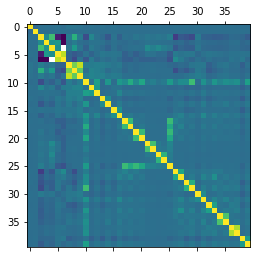

In [30]:
plt.matshow(a1.corr(method='pearson'))
plt.show()

pair plot

In [37]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [ ]:
sns.pairplot(a1)


Câu 9: Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang
- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto

In [44]:
a5 = a.drop(a.columns[[2,3,8,9,10,11,12,13,15,16,17,18,27,28,29,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]], axis=1)
a5

,Record ID,Incident Year,Operator ID,Operator,Aircraft,Aircraft Type,Engine Type,Airport ID,Airport,State,...,Warning Issued,Flight Phase,Visibility,Precipitation,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries
0,127128,1990,DAL,DELTA AIR LINES,B-757-200,A,D,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,...,NaN,CLIMB,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN
1,129779,1990,HAL,HAWAIIAN AIR,DC-9,A,D,PHLI,LIHUE ARPT,HI,...,NaN,TAKEOFF RUN,NaN,NaN,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN
2,129780,1990,UNK,UNKNOWN,UNKNOWN,NaN,NaN,PHLI,LIHUE ARPT,HI,...,NaN,NaN,NaN,NaN,R1101,BARN OWL,1,NaN,NaN,NaN
3,2258,1990,MIL,MILITARY,A-10A,A,D,KMYR,MYRTLE BEACH INTL,SC,...,NaN,APPROACH,DAY,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN
4,2257,1990,MIL,MILITARY,F-16,A,NaN,KJAX,JACKSONVILLE INTL,FL,...,NaN,CLIMB,DAY,NaN,ZX,FINCH,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,SWA,SOUTHWEST AIRLINES,B-737-700,A,D,UNKN,NaN,NaN,...,N,NaN,NaN,NONE,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN
174100,365902,2015,SWA,SOUTHWEST AIRLINES,B-737-700,A,D,KDAL,DALLAS LOVE FIELD ARPT,TX,...,N,APPROACH,DAY,NONE,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN
174101,365903,2015,BUS,BUSINESS,CITATIONJET,A,D,KMIA,MIAMI INTL,FL,...,NaN,CLIMB,DAY,NONE,K1002,TURKEY VULTURE,1,NONE,NaN,NaN
174102,366046,2015,QXE,HORIZON AIR,DHC8 DASH 8,A,C,KPDX,PORTLAND INTL (OR),OR,...,Y,DESCENT,NIGHT,NONE,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN


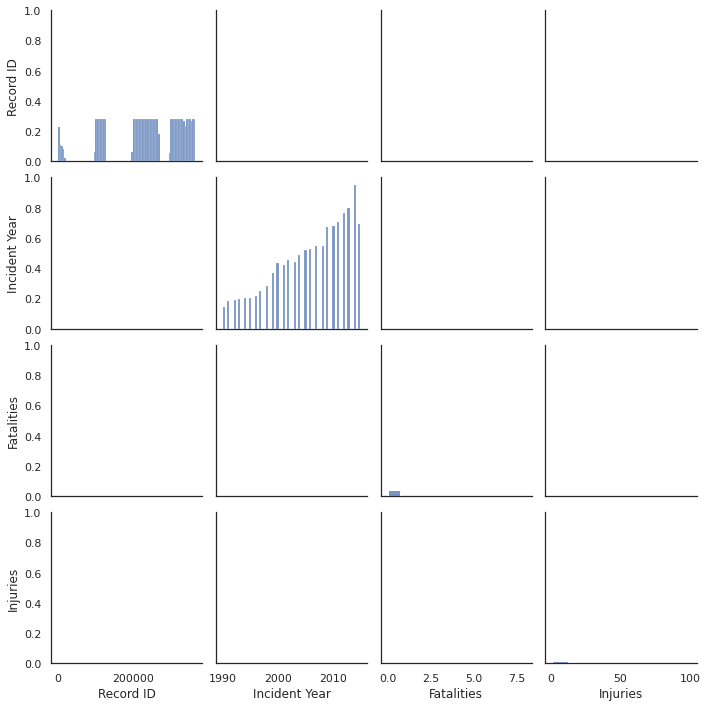

In [48]:
sns.pairplot(a5, kind="barplot")

https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/